In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import classification_report, confusion_matrix


In [20]:
# ========================
# 1. Load dataset
# ========================
df = pd.read_csv("TB tests nairobi data.csv")


In [21]:
df.head()

Patient_ID   Age     Sex HIV_Status BCG_Vaccination History_of_TB  \
0    TB-0001  42.0  Female    Unknown              No            No   
1    TB-0002  30.0  Female   Positive         Unknown            No   
2    TB-0003  51.0    Male   Negative         Unknown           Yes   
3    TB-0004  71.0  Female    Unknown         Unknown           Yes   
4    TB-0005  15.0    Male    Unknown             Yes            No   

  Cough_Duration Hemoptysis Fever Night_Sweats  ... Socioeconomic_Status  \
0       >4 weeks        Yes   Yes          Yes  ...                  NaN   
1      2-4 weeks         No   Yes           No  ...                  Low   
2       <2 weeks         No    No           No  ...               Middle   
3            NaN        Yes    No           No  ...                 High   
4       <2 weeks         No    No           No  ...                  Low   

  Residence         Occupation Immunosuppressive_Therapy Pregnancy_Status  \
0     Rural             Farmer                       Yes     Not Pregnant   
1     Urban         Unemployed                        No         Pregnant   
2      Slum  Healthcare worker                        No     Not Pregnant   
3     Rural         Unemployed                       Yes     Not Pregnant   
4     Urban            Laborer                        No   Not Applicable   

  Tuberculin_Skin_Test IGRA_Test Comorbidities  \
0                  NaN  Negative           HIV   
1             Positive  Negative      Diabetes   
2             Positive  Not Done           NaN   
3             Positive  Negative      Diabetes   
4             Not Done  Negative           NaN   

                   Treatment_History Final_TB_Diagnosis  
0                      MDR treatment       Suspected TB  
1                      MDR treatment       Suspected TB  
2                           New case       Confirmed TB  
3  Treatment after loss to follow-up       Confirmed TB  
4                      MDR treatment       Confirmed TB  

[5 rows x 31 columns]

In [22]:
# 2. Drop unimportant columns
# ========================
df1 = df.drop(columns=[
    'Patient_ID','Socioeconomic_Status','Residence','Occupation',
    'Immunosuppressive_Therapy','Pregnancy_Status','Tuberculin_Skin_Test',
    'IGRA_Test','Comorbidities','Treatment_History'
], errors='ignore')

In [23]:
df1.head()

Age     Sex HIV_Status BCG_Vaccination History_of_TB Cough_Duration  \
0  42.0  Female    Unknown              No            No       >4 weeks   
1  30.0  Female   Positive         Unknown            No      2-4 weeks   
2  51.0    Male   Negative         Unknown           Yes       <2 weeks   
3  71.0  Female    Unknown         Unknown           Yes            NaN   
4  15.0    Male    Unknown             Yes            No       <2 weeks   

  Hemoptysis Fever Night_Sweats Weight_Loss  ... Smoking_Status Alcohol_Use  \
0        Yes   Yes          Yes          No  ...         Smoker         Yes   
1         No   Yes           No         Yes  ...         Smoker          No   
2         No    No           No         NaN  ...         Smoker         NaN   
3        Yes    No           No          No  ...         Smoker          No   
4         No    No           No         Yes  ...     Non-smoker          No   

  Diabetes_Status Chest_Xray_Findings Sputum_Smear_Result GeneXpert_Result  \
0         Present              Normal            Positive         Positive   
1         Present              Normal            Not Done         Positive   
2         Present    Cavitary lesions            Positive         Negative   
3          Absent    Cavitary lesions                 NaN         Positive   
4          Absent              Normal            Negative         Not Done   

  Culture_Result Drug_Resistance Close_Contact_with_TB Final_TB_Diagnosis  
0       Positive          XDR-TB                    No       Suspected TB  
1       Negative          XDR-TB                    No       Suspected TB  
2       Positive          MDR-TB                   Yes       Confirmed TB  
3       Negative          XDR-TB                   Yes       Confirmed TB  
4       Positive          XDR-TB                   Yes       Confirmed TB  

[5 rows x 21 columns]

In [41]:
df1.describe()

Age           Sex    HIV_Status  BCG_Vaccination  \
count  41325.000000  41325.000000  41325.000000     41325.000000   
mean      44.846195      0.525614      0.377955         1.001476   
std       25.052250      0.499350      0.652236         0.793402   
min        1.000000      0.000000      0.000000         0.000000   
25%       24.000000      0.000000      0.000000         0.000000   
50%       45.000000      1.000000      0.000000         1.000000   
75%       66.000000      1.000000      1.000000         2.000000   
max       89.000000      1.000000      2.000000         2.000000   

       History_of_TB  Cough_Duration    Hemoptysis         Fever  \
count   41325.000000    41325.000000  41325.000000  41325.000000   
mean        0.526606        0.948506      0.528252      0.474918   
std         0.499298        0.826645      0.499207      0.499377   
min         0.000000        0.000000      0.000000      0.000000   
25%         0.000000        0.000000      0.000000      0.000000   
50%         1.000000        1.000000      1.000000      0.000000   
75%         1.000000        2.000000      1.000000      1.000000   
max         1.000000        2.000000      1.000000      1.000000   

       Night_Sweats   Weight_Loss  ...   Alcohol_Use  Diabetes_Status  \
count  41325.000000  41325.000000  ...  41325.000000     41325.000000   
mean       0.528106      0.471942  ...      0.526001         0.473128   
std        0.499215      0.499218  ...      0.499330         0.499283   
min        0.000000      0.000000  ...      0.000000         0.000000   
25%        0.000000      0.000000  ...      0.000000         0.000000   
50%        1.000000      0.000000  ...      1.000000         0.000000   
75%        1.000000      1.000000  ...      1.000000         1.000000   
max        1.000000      1.000000  ...      1.000000         1.000000   

       Chest_Xray_Findings  Sputum_Smear_Result  GeneXpert_Result  \
count         41325.000000         41325.000000      41325.000000   
mean              1.421004             0.999008          1.053793   
std               1.136649             0.795413          0.825517   
min               0.000000             0.000000          0.000000   
25%               0.000000             0.000000          0.000000   
50%               1.000000             1.000000          1.000000   
75%               2.000000             2.000000          2.000000   
max               3.000000             2.000000          2.000000   

       Culture_Result  Drug_Resistance  Close_Contact_with_TB  \
count    41325.000000     41325.000000           41325.000000   
mean         0.942480         0.683073               0.473926   
std          0.827345         0.465284               0.499326   
min          0.000000         0.000000               0.000000   
25%          0.000000         0.000000               0.000000   
50%          1.000000         1.000000               0.000000   
75%          2.000000         1.000000               1.000000   
max          2.000000         1.000000               1.000000   

       Final_TB_Diagnosis     TB_Binary  
count        41325.000000  41325.000000  
mean             0.994604      0.671095  
std              0.819196      0.469821  
min              0.000000      0.000000  
25%              0.000000      0.000000  
50%              1.000000      1.000000  
75%              2.000000      1.000000  
max              2.000000      1.000000  

[8 rows x 22 columns]

In [24]:
# 3. Map target variable
# ========================
# First check unique values
print("Unique values in Final_TB_Diagnosis:", df1['Final_TB_Diagnosis'].unique())

Unique values in Final_TB_Diagnosis: ['Suspected TB' 'Confirmed TB' 'Not TB' nan]


In [25]:
# Map TB diagnosis into binary Yes/No
df1['TB_Binary'] = df1['Final_TB_Diagnosis'].replace({
    'Confirmed TB': 'Yes',
    'Suspected TB': 'Yes',
    'No TB': 'No',
    'Not TB': 'No'
})

In [26]:
# Drop rows where mapping failed (still NaN)
df1 = df1.dropna(subset=['TB_Binary'])


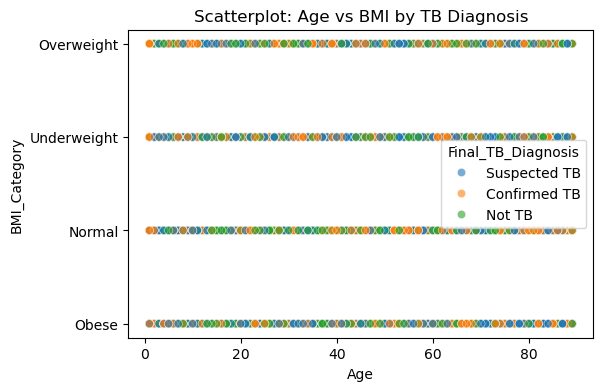

In [27]:
# Example 1: Age vs BMI_Category (if BMI is numeric instead of categorical)
plt.figure(figsize=(6,4))
sns.scatterplot(x="Age", y="BMI_Category", hue="Final_TB_Diagnosis", data=df, alpha=0.6)
plt.title("Scatterplot: Age vs BMI by TB Diagnosis")
plt.show()


In [28]:
# 4. Handle missing values
# ========================
for col in df1.columns:
    if df1[col].dtype == 'object':
        df1[col] = df1[col].fillna(df1[col].mode()[0])
    else:
        df1[col] = df1[col].fillna(df1[col].median())

In [29]:
# 5. Encode categorical variables
# ========================
label_encoders = {}
for col in df1.select_dtypes(include=['object']).columns:
    if col != 'TB_Binary':  # skip target
        le = LabelEncoder()
        df1[col] = le.fit_transform(df1[col])
        label_encoders[col] = le


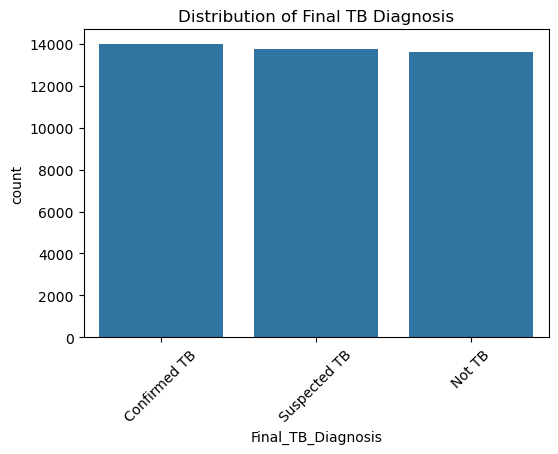

In [30]:
# 2. Target distribution
# -------------------------------
plt.figure(figsize=(6,4))
sns.countplot(x='Final_TB_Diagnosis', data=df, order=df['Final_TB_Diagnosis'].value_counts().index)
plt.title("Distribution of Final TB Diagnosis")
plt.xticks(rotation=45)
plt.show()

In [31]:
# Encode target
le_y = LabelEncoder()
df1['TB_Binary'] = le_y.fit_transform(df1['TB_Binary'])  # Yes=1, No=0

In [32]:
#6. Define features and target
# ========================
X = df1.drop(columns=['Final_TB_Diagnosis','TB_Binary'])
y = df1['TB_Binary']

In [33]:
# 7. Train/test split
# ========================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [34]:
# 8. Train Naive Bayes
# ========================
model = CategoricalNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [40]:

# Display column names and data types
print("\nColumn names and data types:")
print(df.dtypes)

# Check for missing values
print("\n" + "=" * 50)
print("MISSING VALUES ANALYSIS")
print("=" * 50)
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})
print(missing_df[missing_df['Missing Values'] > 0].sort_values('Percentage', ascending=False))

# Descriptive statistics for numerical columns
print("\n" + "=" * 50)
print("DESCRIPTIVE STATISTICS FOR NUMERICAL COLUMNS")
print("=" * 50)
numerical_cols = df.select_dtypes(include=[np.number]).columns
if len(numerical_cols) > 0:
    print(df[numerical_cols].describe())
else:
    print("No numerical columns found.")

# Descriptive statistics for categorical columns
print("\n" + "=" * 50)
print("DESCRIPTIVE STATISTICS FOR CATEGORICAL COLUMNS")
print("=" * 50)
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\n{col}:")
    print(f"Number of unique values: {df[col].nunique()}")
    print("Value counts:")
    print(df[col].value_counts().head(10))  # Show top 10 values
    if df[col].nunique() > 10:
        print(f"... and {df[col].nunique() - 10} more categories")

# Specific analysis for key columns
print("\n" + "=" * 50)
print("KEY INSIGHTS")
print("=" * 50)

# Age distribution
if 'Age' in df.columns:
    print(f"\nAge Statistics:")
    print(f"Mean age: {df['Age'].mean():.2f}")
    print(f"Median age: {df['Age'].median():.2f}")
    print(f"Age range: {df['Age'].min()} - {df['Age'].max()}")
    print(f"Missing age values: {df['Age'].isnull().sum()}")

# Sex distribution
if 'Sex' in df.columns:
    print(f"\nSex Distribution:")
    print(df['Sex'].value_counts())
    print(f"Missing sex values: {df['Sex'].isnull().sum()}")

# HIV Status distribution
if 'HIV_Status' in df.columns:
    print(f"\nHIV Status Distribution:")
    print(df['HIV_Status'].value_counts())
    print(f"Missing HIV status values: {df['HIV_Status'].isnull().sum()}")

# Final TB Diagnosis distribution
if 'Final_TB_Diagnosis' in df.columns:
    print(f"\nFinal TB Diagnosis Distribution:")
    print(df['Final_TB_Diagnosis'].value_counts())
    print(f"Missing diagnosis values: {df['Final_TB_Diagnosis'].isnull().sum()}")

# Drug Resistance distribution
if 'Drug_Resistance' in df.columns:
    print(f"\nDrug Resistance Distribution:")
    print(df['Drug_Resistance'].value_counts())
    print(f"Missing drug resistance values: {df['Drug_Resistance'].isnull().sum()}")

# Correlation matrix for numerical variables (if any)
if len(numerical_cols) > 1:
    print("\n" + "=" * 50)
    print("CORRELATION MATRIX (NUMERICAL VARIABLES)")
    print("=" * 50)
    correlation_matrix = df[numerical_cols].corr()
    print(correlation_matrix)

# Additional analysis for specific clinical indicators
clinical_indicators = ['Cough_Duration', 'Hemoptysis', 'Fever', 'Night_Sweats', 'Weight_Loss']
for indicator in clinical_indicators:
    if indicator in df.columns:
        print(f"\n{indicator} Distribution:")
        print(df[indicator].value_counts())
        print(f"Missing {indicator} values: {df[indicator].isnull().sum()}")

# Test results analysis
test_columns = ['Sputum_Smear_Result', 'GeneXpert_Result', 'Culture_Result']
for test in test_columns:
    if test in df.columns:
        print(f"\n{test} Distribution:")
        print(df[test].value_counts())
        print(f"Missing {test} values: {df[test].isnull().sum()}")

# Generate a summary report
print("\n" + "=" * 50)
print("SUMMARY REPORT")
print("=" * 50)
print(f"Total records: {len(df)}")
print(f"Complete records (no missing values): {len(df.dropna())} ({len(df.dropna())/len(df)*100:.2f}%)")

# Count of records with complete key clinical information
key_columns = ['Age', 'Sex', 'HIV_Status', 'Final_TB_Diagnosis']
complete_key_info = df[key_columns].dropna()
print(f"Records with complete key information: {len(complete_key_info)} ({len(complete_key_info)/len(df)*100:.2f}%)")

# Data quality score (percentage of non-null values across all columns)
data_quality = (1 - df.isnull().mean()).mean()
print(f"Overall data quality score: {data_quality:.2%}")

# Save the descriptive statistics to a file
with open('tb_data_descriptive_statistics.txt', 'w') as f:
    f.write("Descriptive Statistics for TB Tests Nairobi Dataset\n")
    f.write("=" * 55 + "\n")
    f.write(f"Dataset shape: {df.shape}\n")
    f.write(f"Total patients: {len(df)}\n")
    f.write(f"Total features: {len(df.columns)}\n\n")
    
    f.write("Missing Values Summary:\n")
    f.write(missing_df[missing_df['Missing Values'] > 0].sort_values('Percentage', ascending=False).to_string())
    
    if len(numerical_cols) > 0:
        f.write("\n\nNumerical Variables Statistics:\n")
        f.write(df[numerical_cols].describe().to_string())
    
    f.write("\n\nCategorical Variables Summary (Top 10 values each):\n")
    for col in categorical_cols:
        f.write(f"\n{col}:\n")
        f.write(f"Number of unique values: {df[col].nunique()}\n")
        f.write(df[col].value_counts().head(10).to_string())
        f.write("\n")

print("\nDescriptive statistics have been saved to 'tb_data_descriptive_statistics.txt'")


Column names and data types:
Patient_ID                    object
Age                          float64
Sex                           object
HIV_Status                    object
BCG_Vaccination               object
History_of_TB                 object
Cough_Duration                object
Hemoptysis                    object
Fever                         object
Night_Sweats                  object
Weight_Loss                   object
BMI_Category                  object
Smoking_Status                object
Alcohol_Use                   object
Diabetes_Status               object
Chest_Xray_Findings           object
Sputum_Smear_Result           object
GeneXpert_Result              object
Culture_Result                object
Drug_Resistance               object
Close_Contact_with_TB         object
Socioeconomic_Status          object
Residence                     object
Occupation                    object
Immunosuppressive_Therapy     object
Pregnancy_Status              object
Tubercul


Classification Report:

              precision    recall  f1-score   support

          No       0.00      0.00      0.00      4078
         Yes       0.67      1.00      0.80      8320

    accuracy                           0.67     12398
   macro avg       0.34      0.50      0.40     12398
weighted avg       0.45      0.67      0.54     12398



C:\Users\hp820\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hp820\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hp820\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


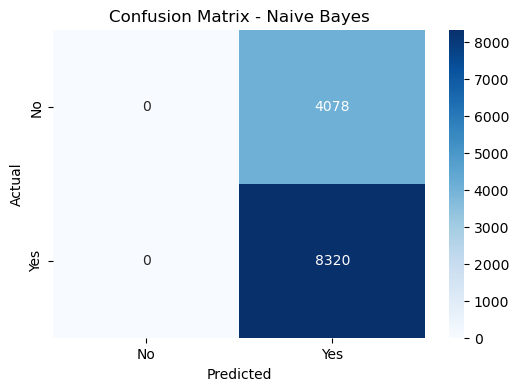

In [36]:
# 9. Evaluation
# ========================
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=['No','Yes']))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['No','Yes'],
            yticklabels=['No','Yes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Naive Bayes")
plt.show()
